In [1]:
import pandas as pd
dados2022 = pd.read_excel(r'C:\\Users\\enzov\\Desktop\\FACULDADE\\2024-2\\ESTATISTICA\\Analise Descritiva Banco de Dados\\2022\\dados_2022.xlsx')

## **.Verifica os 5 produtos mais vendidos de toda tabela** 

In [2]:

produtos_mais_vendidos = dados2022.groupby(['product_id', 'product_name'])['units_sold_kg'].sum().reset_index()

produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='units_sold_kg', ascending=False)

print(produtos_mais_vendidos.head(5)) 

                              product_id product_name  units_sold_kg
11  57ad2178-9598-4981-b0f7-78a91162821e       Cheese        3208086
10  4a0f8862-c851-4073-bc17-3a3d93834902         Beef        3099405
21  b12c721e-8301-4b08-8ac3-d435be9b8b32         Lamb        2938930
1   0985f295-bb82-484f-9cab-76637e8e8bdb      Chicken        2906429
20  9bb2d8db-a7ac-4d40-9d3c-0c96cafe7153       Butter        2838575


## **.Busca em cada mês do ano a quantidade dos top 5 produtos mais vendidos**

In [3]:
import pandas as pd

# Carregar os dados
dados2022['sale_date'] = pd.to_datetime(dados2022['sale_date'])

# Adicionar a coluna de mês (1 para Janeiro, 2 para Fevereiro, etc.)
dados2022['month'] = dados2022['sale_date'].dt.month

# Obter os 5 produtos mais vendidos no ano inteiro
top_produtos_geral = (
    dados2022.groupby('product_name')['units_sold_kg']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar os dados para incluir apenas os produtos mais vendidos no ano inteiro
dados_top = dados2022[dados2022['product_name'].isin(top_produtos_geral)]

# Criar os dicionários para cada mês
dicionarios_meses = {}
for mes in range(1, 13):  # De Janeiro (1) a Dezembro (12)
    # Filtrar dados para o mês específico
    vendas_mes = (
        dados_top[dados_top['month'] == mes]
        .groupby('product_name')['units_sold_kg']
        .sum()
        .sort_values(ascending=False)
        .head(5)  # Considerar apenas os 5 produtos mais vendidos no mês
        .to_dict()
    )
    dicionarios_meses[mes] = vendas_mes

# Exibir os dicionários criados
meses_nomes = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

for mes, dados in dicionarios_meses.items():
    print(f"{meses_nomes[mes]}:")
    print(dados)
    print()


Janeiro:
{'Butter': 404886, 'Lamb': 360525, 'Beef': 288428, 'Cheese': 139913, 'Chicken': 132433}

Fevereiro:
{'Beef': 297576, 'Lamb': 295125, 'Chicken': 240248, 'Cheese': 199901, 'Butter': 194787}

Março:
{'Butter': 455563, 'Cheese': 332956, 'Chicken': 329039, 'Beef': 264975, 'Lamb': 148957}

Abril:
{'Beef': 345820, 'Lamb': 265424, 'Cheese': 233685, 'Butter': 185964, 'Chicken': 155235}

Maio:
{'Beef': 384801, 'Lamb': 320886, 'Cheese': 307352, 'Butter': 242104, 'Chicken': 207173}

Junho:
{'Chicken': 293540, 'Beef': 246918, 'Lamb': 209532, 'Cheese': 160537, 'Butter': 121315}

Julho:
{'Cheese': 344489, 'Beef': 286563, 'Lamb': 234046, 'Butter': 220856, 'Chicken': 211164}

Agosto:
{'Chicken': 368917, 'Butter': 281319, 'Lamb': 276572, 'Cheese': 248687, 'Beef': 216735}

Setembro:
{'Cheese': 291635, 'Chicken': 233787, 'Beef': 233356, 'Lamb': 181557, 'Butter': 106502}

Outubro:
{'Cheese': 305263, 'Chicken': 277816, 'Butter': 261414, 'Lamb': 232799, 'Beef': 225886}

Novembro:
{'Cheese': 280974, 

## **.Plotagem de grafico com os valores vendidos de cada um dos top 5 produtos ao longo do ano**

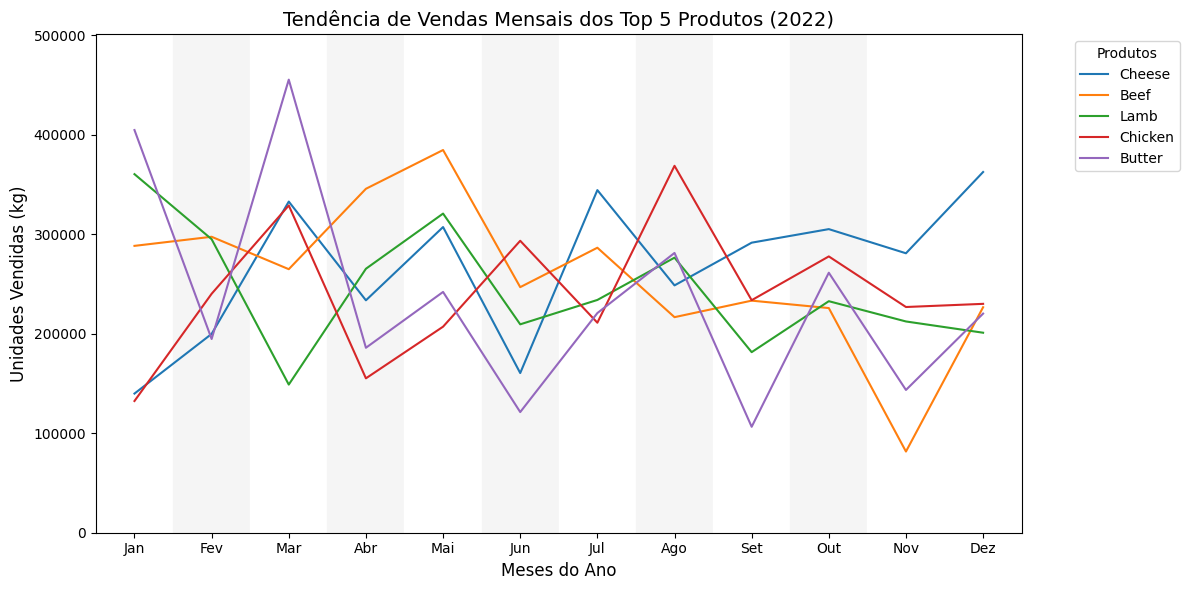

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

dados2022['sale_date'] = pd.to_datetime(dados2022['sale_date'])

# Adicionar a coluna de mês
dados2022['month'] = dados2022['sale_date'].dt.month

# Obter os 5 produtos mais vendidos no ano inteiro
top_produtos_geral = (
    dados2022.groupby('product_name')['units_sold_kg']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar os dados para incluir apenas os produtos mais vendidos no ano inteiro
dados_top = dados2022[dados2022['product_name'].isin(top_produtos_geral)]

# Criar os dicionários para cada mês
dicionarios_meses = {}
for mes in range(1, 13):
    vendas_mes = (
        dados_top[dados_top['month'] == mes]
        .groupby('product_name')['units_sold_kg']
        .sum()
        .to_dict()
    )
    dicionarios_meses[mes] = vendas_mes

# Preparar os dados para o gráfico
meses = list(range(1, 13))
produtos = list(top_produtos_geral)
valores_por_mes = {
    produto: [dicionarios_meses.get(mes, {}).get(produto, 0) for mes in meses]
    for produto in produtos
}

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado (branco e cinza claro) para os meses
for i in range(len(meses)):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.add_patch(patches.Rectangle((i - 0.5, 0), 1, max(max(valores_por_mes.values())) * 1.1, color=cor, zorder=0))

# Adicionar as linhas para cada produto
for produto, valores in valores_por_mes.items():
    ax.plot(meses, valores, label=produto)

# Configurar os eixos
ax.set_xticks(meses)
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Unidades Vendidas (kg)', fontsize=12)
ax.set_title('Tendência de Vendas Mensais dos Top 5 Produtos (2022)', fontsize=14)

# Ajustar os limites dos eixos
ax.set_ylim(0, max(max(valores_por_mes.values())) * 1.1)
ax.set_xlim(0.5, 12.5)

# Adicionar a grade
ax.grid(False)  # Desativar a grade

# Adicionar legenda
ax.legend(title='Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


## **.Verificando a quantidade dos top 5 produtos por estação do ano**

In [5]:
import pandas as pd

dados2022['sale_date'] = pd.to_datetime(dados2022['sale_date'])

# Determinar as estações com base na coluna 'sale_date'
def get_season(month):
    if month in [3, 4, 5]:  # Março, Abril, Maio -> Primavera
        return 'Primavera'
    elif month in [6, 7, 8]:  # Junho, Julho, Agosto -> Verão
        return 'Verao'
    elif month in [9, 10, 11]:  # Setembro, Outubro, Novembro -> Outono
        return 'Outono'
    else:  # Dezembro, Janeiro, Fevereiro -> Inverno
        return 'Inverno'

# Adicionar a estação como uma nova coluna
dados2022['season'] = dados2022['sale_date'].dt.month.apply(get_season)

# Obter os 10 produtos mais vendidos no ano de 2022
top_produtos = (
    dados2022.groupby('product_name')['units_sold_kg']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar os dados apenas para os 10 produtos mais vendidos
dados_top = dados2022[dados2022['product_name'].isin(top_produtos)]

# Criar os dicionários para cada estação
dicionarios_estacoes = {}
for estacao in ['Primavera', 'Verao', 'Outono', 'Inverno']:
    # Agrupar por produto e calcular as vendas por estação
    vendas_estacao = (
        dados_top[dados_top['season'] == estacao]
        .groupby('product_name')['units_sold_kg']
        .sum()
        .to_dict()
    )
    dicionarios_estacoes[estacao] = vendas_estacao

# Exibir os dicionários criados
for estacao, dados in dicionarios_estacoes.items():
    print(f"{estacao}:")
    print(dados)
    print()


Primavera:
{'Beef': 995596, 'Butter': 883631, 'Cheese': 873993, 'Chicken': 691447, 'Lamb': 735267}

Verao:
{'Beef': 750216, 'Butter': 623490, 'Cheese': 753713, 'Chicken': 873621, 'Lamb': 720150}

Outono:
{'Beef': 540867, 'Butter': 511460, 'Cheese': 877872, 'Chicken': 738551, 'Lamb': 626769}

Inverno:
{'Beef': 812726, 'Butter': 819994, 'Cheese': 702508, 'Chicken': 602810, 'Lamb': 856744}



## **.Plotagem de grafico com a quantidade dos top 5 produtos por estação do ano**

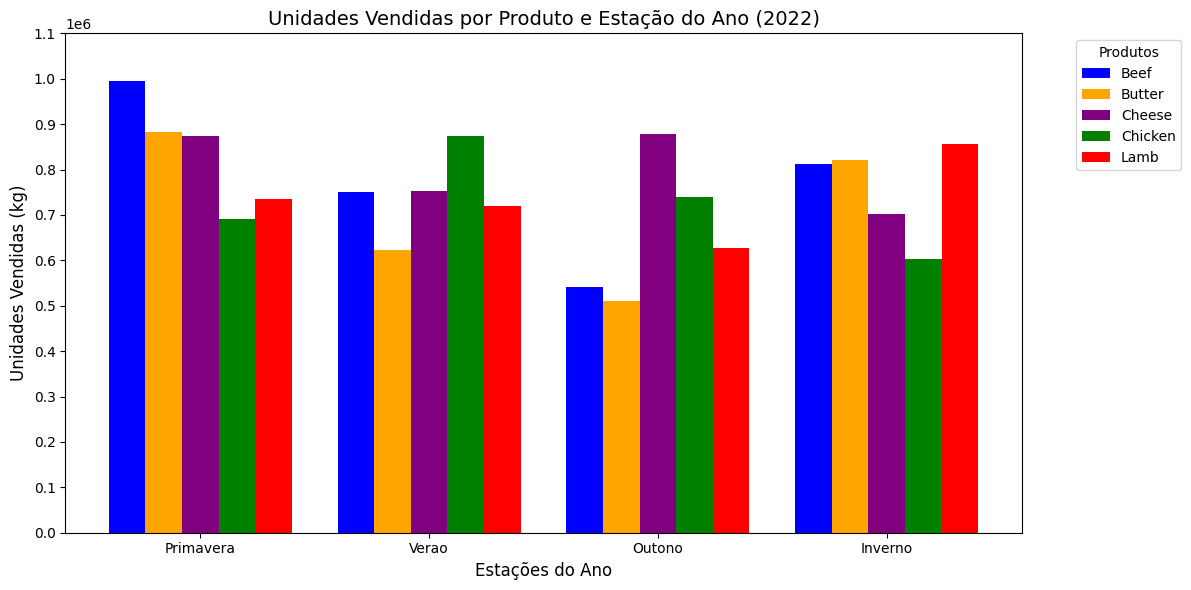

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o gráfico
estacoes = ['Primavera', 'Verao', 'Outono', 'Inverno']
produtos = list(dicionarios_estacoes['Primavera'].keys())
valores_por_estacao = [[dicionarios_estacoes[estacao].get(produto, 0) for produto in produtos] for estacao in estacoes]

# Mapeamento de cores para os produtos
cores_produtos = {
    'Beef': 'blue',
    'Butter': 'orange',
    'Chicken': 'green',
    'Lamb': 'red',
    'Cheese': 'purple',
}

# Configuração do gráfico
bar_width = 0.8 / len(produtos)  # Largura de cada barra (ajustado para caber no grupo)
x = np.arange(len(estacoes))  # Posições para as estações

# Criar a figura
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as barras ao gráfico
for i, produto in enumerate(produtos):
    valores = [valores_por_estacao[j][i] for j in range(len(estacoes))]
    cor = cores_produtos.get(produto, 'gray')  # Pega a cor definida, ou 'gray' se o produto não estiver no mapeamento
    ax.bar(x + i * bar_width, valores, bar_width, label=produto, color=cor)

# Configurar os eixos
ax.set_xlabel('Estações do Ano', fontsize=12)
ax.set_ylabel('Unidades Vendidas (kg)', fontsize=12)
ax.set_title('Unidades Vendidas por Produto e Estação do Ano (2022)', fontsize=14)
ax.set_xticks(x + bar_width * (len(produtos) - 1) / 2)
ax.set_xticklabels(estacoes)

# Ajustar a escala do eixo vertical para 100 mil em 100 mil até 2 milhões
ax.set_ylim(0, 1100000)
ax.set_yticks(range(0, 1200000, 100000))

# Adicionar legenda
ax.legend(title='Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_11280\3266231180.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


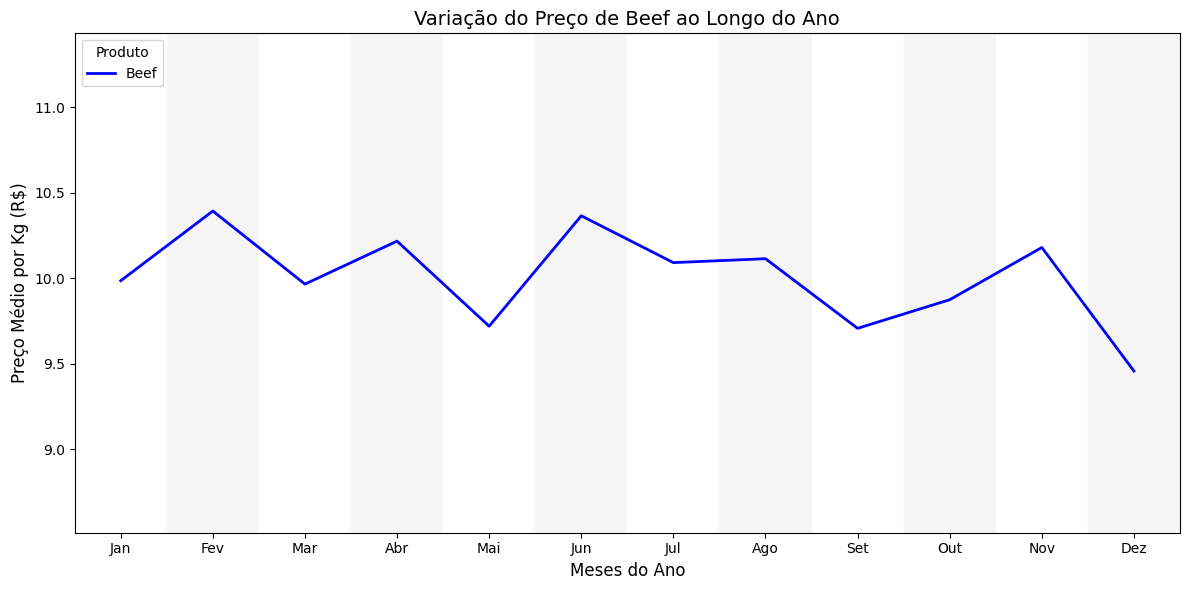

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

dados2022['sale_date'] = pd.to_datetime(dados2022['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Beef'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'blue'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2022[dados2022['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_11280\1954341192.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


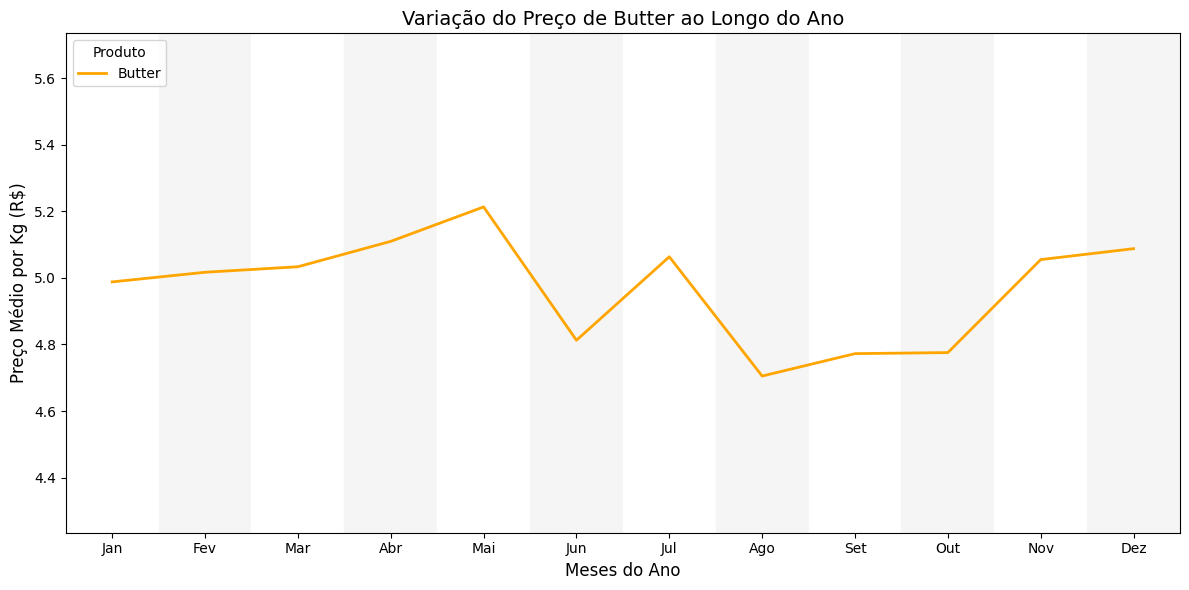

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados2022['sale_date'] = pd.to_datetime(dados2022['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Butter'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'orange'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2022[dados2022['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_11280\2101513613.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


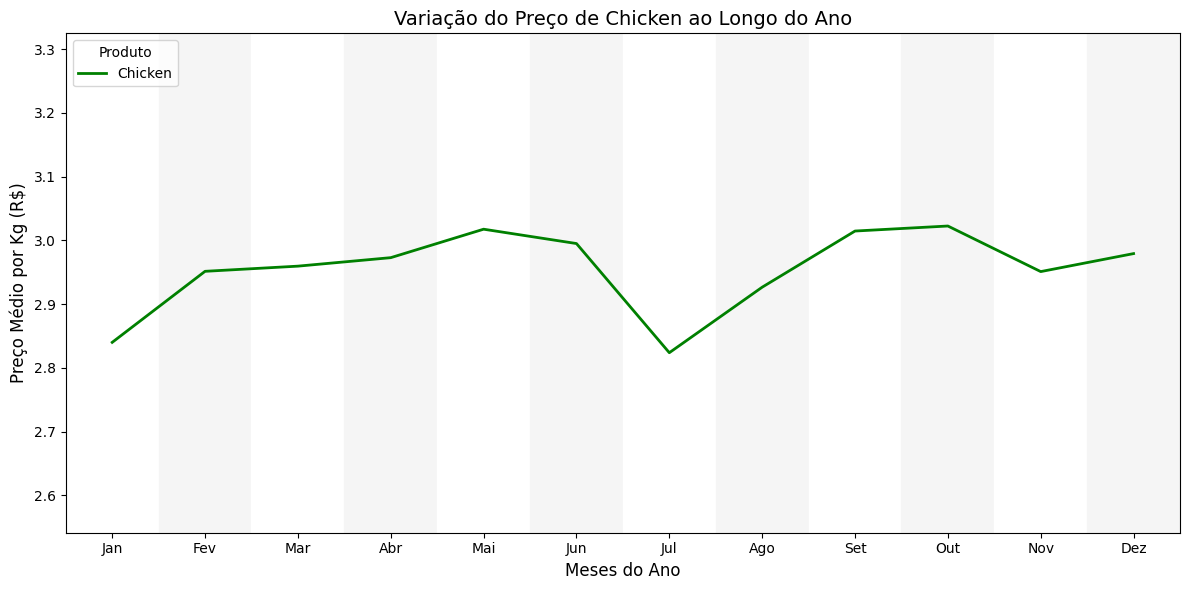

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados2022['sale_date'] = pd.to_datetime(dados2022['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Chicken'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'green'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2022[dados2022['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_11280\2373157220.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


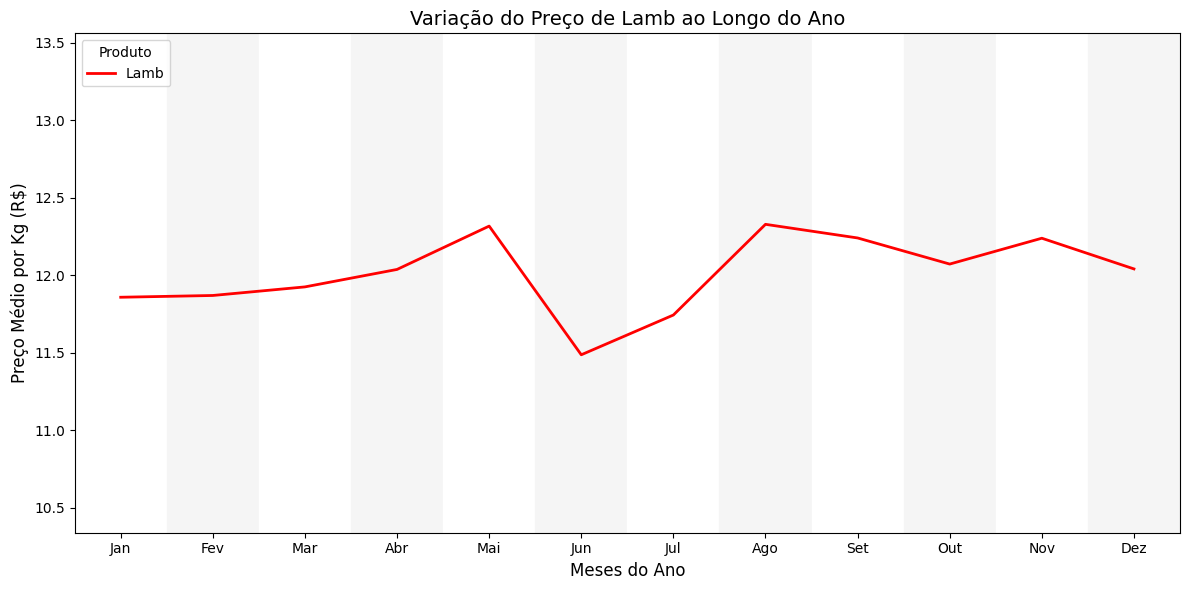

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados2022['sale_date'] = pd.to_datetime(dados2022['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Lamb'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'red'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2022[dados2022['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_11280\1678480107.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


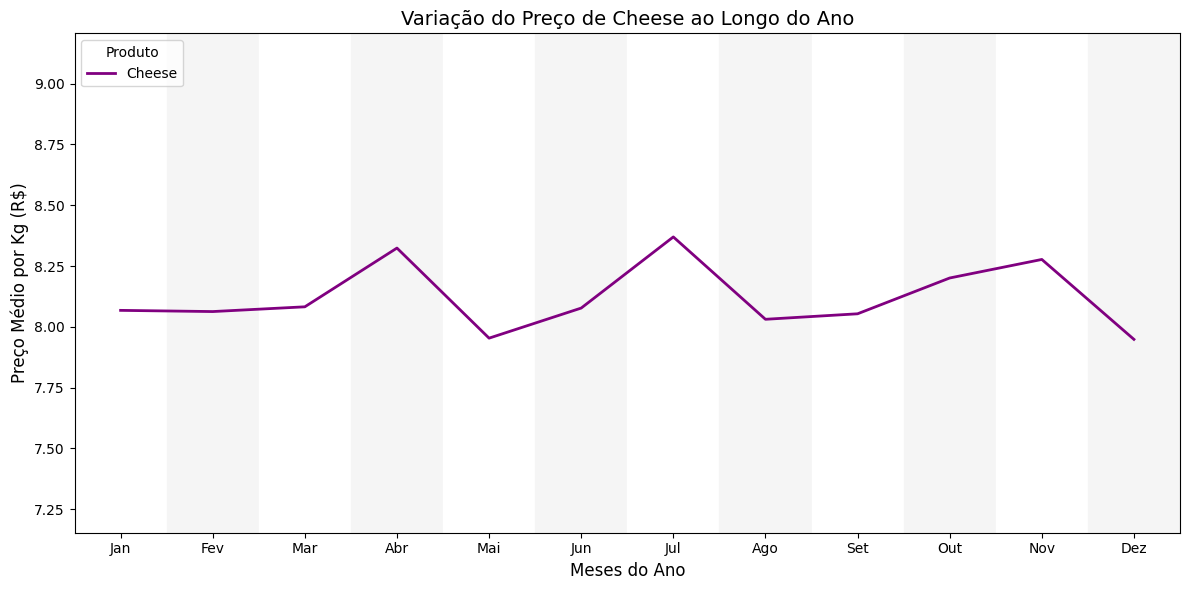

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados2022['sale_date'] = pd.to_datetime(dados2022['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Cheese'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'purple'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados2022[dados2022['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd

# Filtrar os produtos desejados
products = ['Cheese', 'Beef', 'Lamb', 'Chicken', 'Butter', 'Milk', 'Yogurt']
filtered_df = dados2022[dados2022['product_name'].isin(products)]

# Calcular o preço médio por produto
average_price = filtered_df.groupby('product_name')['price_per_kg'].mean()

# Exibir o resultado
print(average_price)

product_name
Beef       10.006147
Butter      4.964518
Cheese      8.119305
Chicken     2.955330
Lamb       12.008017
Milk        1.197104
Yogurt      2.991483
Name: price_per_kg, dtype: float64
